# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

# The dataset 

In [2]:
file_path = r"D:\Nadia\ML_DS_Projects\ds_datasets\Titanic-Dataset.csv"
titanic_data = pd.read_csv(file_path)

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

# # Explore the Dataset

In [6]:
# Check the total number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

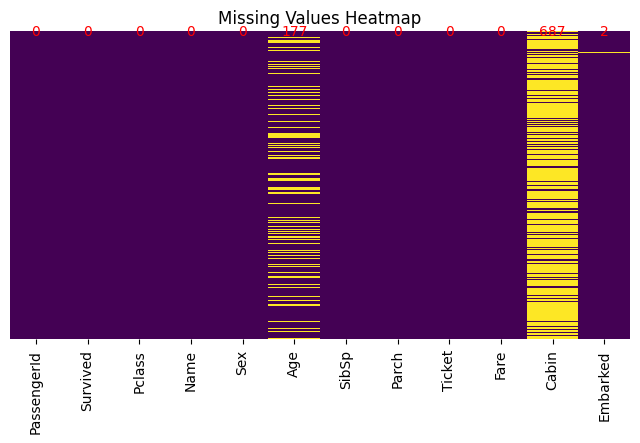

In [7]:
# creating heatmap to see where the data is missing:

missing_counts = titanic_data.isnull().sum()     # Calculate missing values per column
plt.figure(figsize=(8, 4))
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')

# Add missing value counts above columns
for i, col in enumerate(titanic_data.columns):
    plt.text(i + 0.5, -2, f"{missing_counts[col]}", ha='center', va='center', fontsize=10, color='red')
plt.show()

In [8]:
# how many passengers survived?
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
sns.set()

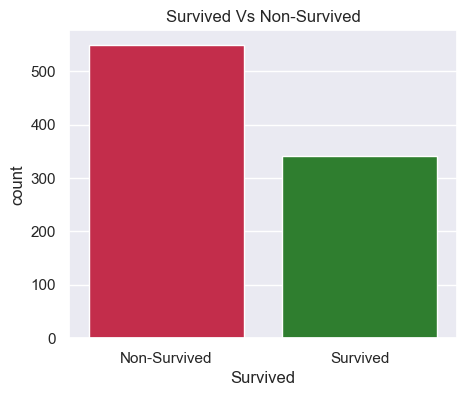

In [10]:
# Fix: Use string keys for the palette dictionary
palette_colors = {'0': 'crimson', '1': 'forestgreen'}

# Convert 'Survived' column to string for correct palette mapping
titanic_data['Survived'] = titanic_data['Survived'].astype(str)

plt.figure(figsize=(5, 4))

# Plot countplot with the corrected palette mapping
sns.countplot(x='Survived', data=titanic_data, hue='Survived', palette=palette_colors, legend=False)  

# Labeling
plt.xticks(ticks=[0, 1], labels=['Non-Survived', 'Survived'])
plt.title('Survived Vs Non-Survived')

plt.show()

In [11]:
# Total Gender count?
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

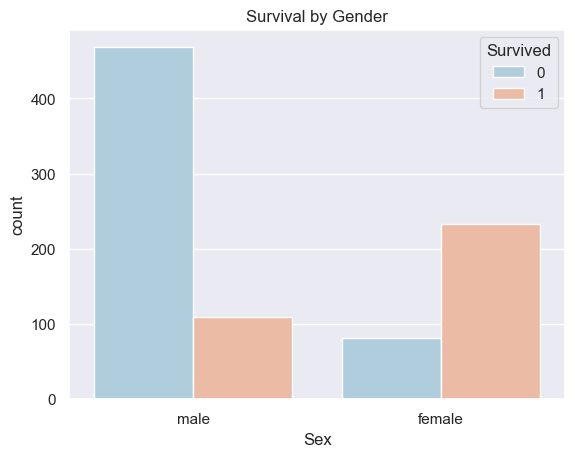

<Figure size 500x300 with 0 Axes>

In [12]:
# count of Survivors gender based:
sns.countplot(x='Sex', hue='Survived', data=titanic_data, palette='RdBu_r')         

# Define a fixed color palette for consistency
palette_colors = {'0': 'lightblue', '1': 'peachpuff'} 
plt.title('Survival by Gender')
plt.figure(figsize=(5, 3))
plt.show()

In [13]:
# Total count by Pclass wise?
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

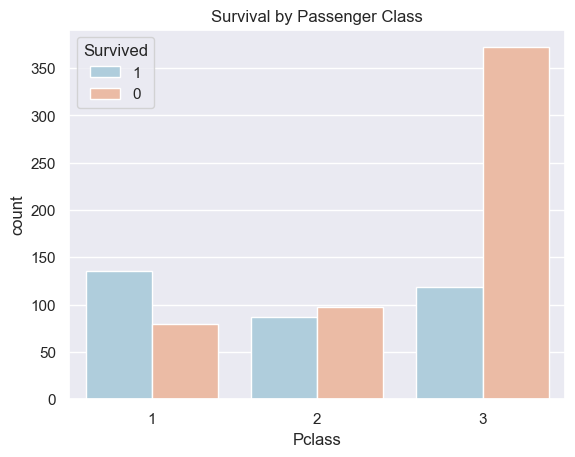

In [14]:
# count of survivors class wise: 
sns.countplot(x='Pclass', hue='Survived', data=titanic_data, palette='RdBu_r')
plt.title('Survival by Passenger Class')
plt.show()

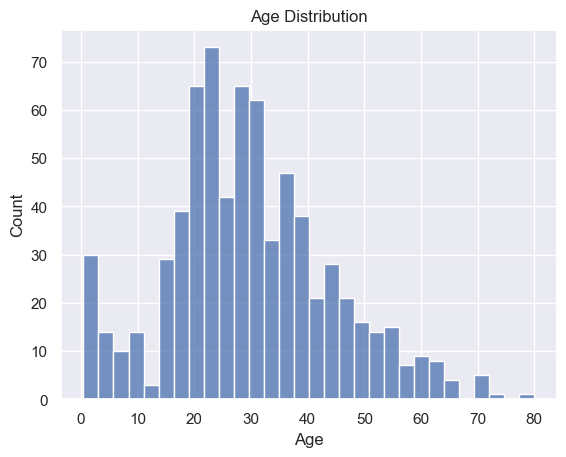

In [15]:
# Total passengers Age analysis:
sns.histplot(titanic_data['Age'].dropna(), bins=30, kde=False)
plt.title('Age Distribution')
plt.show()

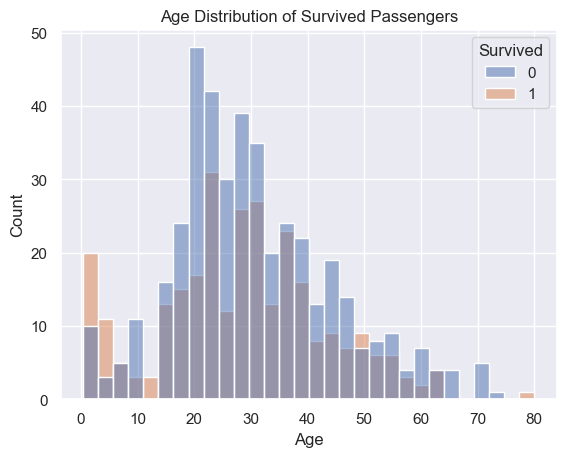

In [16]:
# survivors age analysis:
sns.histplot(data=titanic_data.dropna(subset=['Age']), x='Age', hue='Survived', bins=30, kde=False)
plt.title('Age Distribution of Survived Passengers')
plt.show()

# Data Preprocessing

## Data Cleaning

In [17]:
# dropping the Cabin column as it is not required:
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [18]:
# replacing the missing values with mean value in Age column:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [19]:
# fix Embarked column by using mode:
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [20]:
# applying the index no.
print(titanic_data['Embarked'].mode()[0])

S


In [21]:
# replacing the mode value with the missing values:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [22]:
# to recheck any null value is left:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Detect & Handling Outliers 

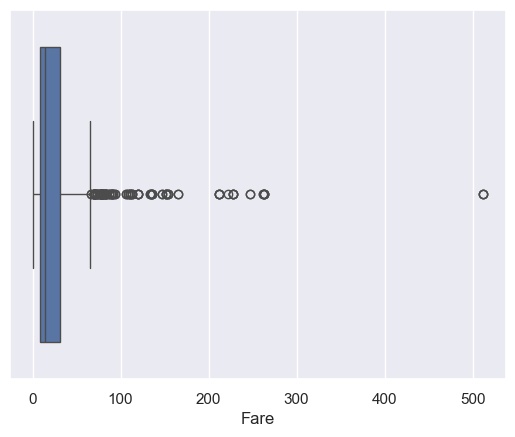

In [23]:
# Check for outliers in 'Fare':
sns.boxplot(x=titanic_data['Fare'])
plt.show()

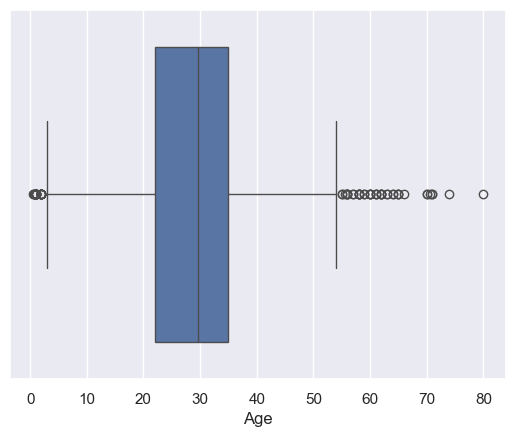

In [24]:
# Check for outliers in 'Age':
sns.boxplot(x=titanic_data['Age'])
plt.show()

In [25]:
# Calculate Q1, Q3, and IQR
Q1 = titanic_data['Fare'].quantile(0.25)
Q3 = titanic_data['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Find the number of outliers
outliers = titanic_data[(titanic_data['Fare'] < lower_bound) | (titanic_data['Fare'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")

Lower Bound: -26.724, Upper Bound: 65.6344
Number of Outliers: 116


In [26]:
# Define upper and lower bounds
lower_bound = 0  # Since fare cannot be negative
upper_bound = 65.6344  

# Apply capping
titanic_data['Fare'] = np.where(titanic_data['Fare'] > upper_bound, upper_bound, titanic_data['Fare'])
titanic_data['Fare'] = np.where(titanic_data['Fare'] < lower_bound, lower_bound, titanic_data['Fare'])

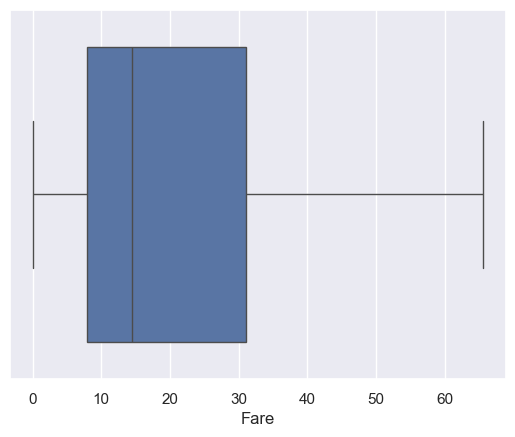

In [27]:
sns.boxplot(x=titanic_data['Fare'])
plt.show()

In [28]:
# Calculate Q1, Q3, and IQR on Age:
Q1 = titanic_data['Age'].quantile(0.25)
Q3 = titanic_data['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
titanic_data['Age'] = titanic_data['Age'].clip(lower_bound, upper_bound)
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Find the number of outliers
outliers = titanic_data[(titanic_data['Age'] < lower_bound) | (titanic_data['Age'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")

Lower Bound: 2.5, Upper Bound: 54.5
Number of Outliers: 0


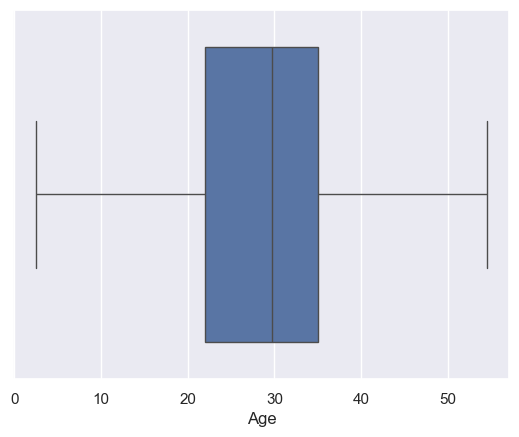

In [29]:
sns.boxplot(x=titanic_data['Age'])
plt.show()

In [30]:
# Convert Age into Age_Group categories after handling outliers
titanic_data['Age_Group'] = pd.cut(titanic_data['Age'], bins=[0, 12, 18, 50, 80], labels=['Child', 'Teen', 'Adult', 'Senior'])

In [31]:
# Categorizing SibSp and Parch:
titanic_data['SibSp_Group'] = titanic_data['SibSp'].apply(lambda x: '0' if x == 0 else ('1-2' if x <= 2 else '3+'))
titanic_data['Parch_Group'] = titanic_data['Parch'].apply(lambda x: '0' if x == 0 else ('1-2' if x <= 2 else '3+'))

### Additional Feature Engineering

In [32]:
# Family Size (Better than SibSp & Parch):
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

# Create grouped versions of SibSp and Parch
sibsp_mapping = {0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 8: 2}  # Group into 0, 1-2, 3+
parch_mapping = {0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 2}  # Similar grouping

titanic_data['SibSp_Group'] = titanic_data['SibSp'].map(sibsp_mapping)
titanic_data['Parch_Group'] = titanic_data['Parch'].map(parch_mapping)

In [33]:
# To figure Alone travellers:
titanic_data['IsAlone'] = (titanic_data['FamilySize'] == 1).astype(int)

In [34]:
# Creating Fare per person:
titanic_data['FarePerPerson'] = titanic_data['Fare'] / titanic_data['FamilySize']

In [35]:
# Fare distribution by Category:
bins = [0, 10, 30, 50, 70]  # Adjusted bins within your min-max range
labels = ['Low', 'Medium', 'High', 'Very High']

titanic_data['FareCategory'] = pd.cut(titanic_data['Fare'], bins=bins, labels=labels, include_lowest=True)

# Convert to numerical codes:
titanic_data['FareCategory'] = titanic_data['FareCategory'].astype('category').cat.codes

print(titanic_data[['Fare', 'FareCategory']].head())  

      Fare  FareCategory
0   7.2500             0
1  65.6344             3
2   7.9250             0
3  53.1000             3
4   8.0500             0


### Converting the Categorical Columns

In [36]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [37]:
# conveting categorical variables to binary: 
titanic_data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

# Mapping Age_Group categories to numerical values:
age_mapping = {'Child': 0, 'Teen': 1, 'Adult': 2, 'Senior': 3}
titanic_data['Age_Group'] = titanic_data['Age_Group'].map(age_mapping)

In [38]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group,SibSp_Group,Parch_Group,FamilySize,IsAlone,FarePerPerson,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,2,1,0,2,0,3.6250,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,65.6344,1,2,1,0,2,0,32.8172,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,2,0,0,1,1,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,2,1,0,2,0,26.5500,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,2,0,0,1,1,8.0500,0


#### Separating Features & Target 

In [39]:
# Drop irrelevant columns: 
X = titanic_data.drop(columns=['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Survived'],axis=1)
Y = titanic_data['Survived']

In [40]:
print(X)

     Pclass  Sex  Embarked Age_Group  SibSp_Group  Parch_Group  FamilySize  \
0         3    0         0         2            1            0           2   
1         1    1         1         2            1            0           2   
2         3    1         0         2            0            0           1   
3         1    1         0         2            1            0           2   
4         3    0         0         2            0            0           1   
..      ...  ...       ...       ...          ...          ...         ...   
886       2    0         0         2            0            0           1   
887       1    1         0         2            0            0           1   
888       3    1         0         2            1            1           4   
889       1    0         1         2            0            0           1   
890       3    0         2         2            0            0           1   

     IsAlone  FarePerPerson  FareCategory  
0          0       

In [41]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: object


#### Spliting the data into Training data and Test data

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit & transform training data
X_test = scaler.transform(X_test)  # Transform test data 

In [44]:
print(X.shape,X_train.shape,X_test.shape) 

(891, 10) (712, 10) (179, 10)


In [45]:
print(titanic_data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Age_Group        0
SibSp_Group      0
Parch_Group      0
FamilySize       0
IsAlone          0
FarePerPerson    0
FareCategory     0
dtype: int64


#####  Model Training 
###### Logistic Regression 

In [46]:
# Train Logistic Regression Model with training data:
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced', random_state=42)

##### Model Evaluation 

In [47]:
# Get predicted probabilities for training data
X_train_probs = model.predict_proba(X_train)[:, 1]  # Probability of "Survived"

# Apply custom threshold:
threshold = 0.5
X_train_prediction = (X_train_probs > threshold).astype(int)

In [48]:
print(X_train_probs)

[0.45736935 0.2874739  0.14062213 0.12438292 0.55546103 0.73850939
 0.45368481 0.31381402 0.14059525 0.53183506 0.84653316 0.18063357
 0.28634387 0.21763506 0.14207843 0.89696501 0.94565737 0.96915093
 0.2874739  0.97065335 0.55546103 0.07599164 0.69228753 0.9426952
 0.53563272 0.16999294 0.74103399 0.14206292 0.4007734  0.21661858
 0.14073726 0.56794388 0.14000184 0.96497645 0.20552002 0.49876162
 0.21809966 0.85028104 0.58586978 0.89696501 0.14000184 0.14059525
 0.84653316 0.30007298 0.52234038 0.13981849 0.80538559 0.14025042
 0.72070786 0.83155533 0.69108935 0.26159312 0.85023296 0.20555112
 0.73685231 0.14130249 0.69084534 0.92706454 0.81681689 0.96915093
 0.2444871  0.133483   0.83155533 0.16998842 0.69228753 0.16914362
 0.14207843 0.14073726 0.14059525 0.14000184 0.35762472 0.74743949
 0.23760687 0.20555112 0.16999294 0.37202335 0.13974978 0.14073726
 0.89857237 0.28358853 0.83155533 0.96148969 0.61561516 0.84653316
 0.14130249 0.34678937 0.29715073 0.24427107 0.45368481 0.80121

In [49]:
# Get predicticted probabilities on test data: 
X_test_probs = model.predict_proba(X_test)[:, 1]  # Probability of "Survived"
X_test_prediction = (X_test_probs > threshold).astype(int)

# Convert true labels to integer type: 
Y_test = Y_test.astype(int)  
Y_train = Y_train.astype(int)

In [50]:
print(X_test_probs)

[0.21333869 0.28358853 0.14062213 0.97781607 0.86136532 0.96148969
 0.77961007 0.15486125 0.87418782 0.88784215 0.54821877 0.14073726
 0.49876162 0.16998842 0.2874739  0.97710969 0.54770379 0.77971372
 0.2874739  0.62206848 0.14059525 0.45368481 0.66011021 0.14182325
 0.18021083 0.1240209  0.51321742 0.2874739  0.1240209  0.69097419
 0.14059525 0.69080466 0.57948718 0.69047912 0.2434107  0.18976381
 0.53183506 0.77961007 0.94970928 0.14059525 0.24191499 0.12404794
 0.14073726 0.20555112 0.84954814 0.24615223 0.14083706 0.14182325
 0.13981849 0.40091778 0.87838066 0.90560334 0.06077631 0.72070786
 0.11639059 0.96558263 0.28358853 0.97475566 0.85428491 0.77977914
 0.14048409 0.9434436  0.83155533 0.45250493 0.20555112 0.73370639
 0.49588653 0.14057611 0.29002    0.91767871 0.84898331 0.91770299
 0.51755421 0.95953305 0.14055696 0.15747623 0.77961007 0.93103656
 0.84653316 0.69341736 0.08549595 0.84404246 0.95953305 0.20553557
 0.4123059  0.44740715 0.95632522 0.96710526 0.34678937 0.1400

In [51]:
# Calculate accuracy:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
# Accuracy Score:
print(f"Training Accuracy: {training_data_accuracy:.4f}") 
print(f"Test Accuracy: {test_data_accuracy:.4f}")

Training Accuracy: 0.7879
Test Accuracy: 0.7933


The training accuracy is 79% which is similar to the test accuracy score which is 79.3%.
This suggests that the model generalizes well and is not overfitting. 

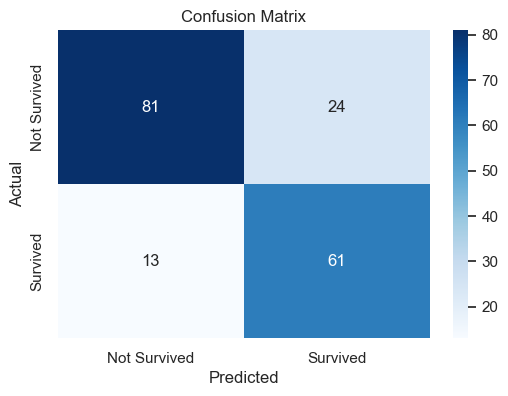

In [52]:
# Generate Confusion Matrix
cm = confusion_matrix(Y_test, X_test_prediction)

# Plot the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [53]:
from sklearn.metrics import classification_report

# Generate Classification Report
report = classification_report(Y_test, X_test_prediction)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.77      0.81       105
           1       0.72      0.82      0.77        74

    accuracy                           0.79       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.80      0.79      0.79       179

